<a href="https://colab.research.google.com/github/Ash-Cash11/Retail-Sales-Customer-Behaviour_analysis-Project/blob/main/Retail_sales_%26_customer_Behaviour_analysis_of_e_commerce_platform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving zepto_sales_data.csv to zepto_sales_data.csv


In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
df = pd.read_csv("zepto_sales_data.csv")

In [ ]:
df.head()

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
0,Fruits & Vegetables,Onion,2500,16,3,2100,1000,False,1
1,Fruits & Vegetables,Tomato Hybrid,4200,16,3,3500,1000,False,1
2,Fruits & Vegetables,Tender Coconut,5100,15,3,4300,58,False,1
3,Fruits & Vegetables,Coriander Leaves,2000,15,3,1700,100,False,100
4,Fruits & Vegetables,Ladies Finger,1400,14,3,1200,250,False,250


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Category                3732 non-null   object
 1   name                    3732 non-null   object
 2   mrp                     3732 non-null   int64 
 3   discountPercent         3732 non-null   int64 
 4   availableQuantity       3732 non-null   int64 
 5   discountedSellingPrice  3732 non-null   int64 
 6   weightInGms             3732 non-null   int64 
 7   outOfStock              3732 non-null   bool  
 8   quantity                3732 non-null   int64 
dtypes: bool(1), int64(6), object(2)
memory usage: 237.0+ KB


In [6]:
df.shape

(3732, 9)

In [7]:
df.columns

Index(['Category', 'name', 'mrp', 'discountPercent', 'availableQuantity',
       'discountedSellingPrice', 'weightInGms', 'outOfStock', 'quantity'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Category,0
name,0
mrp,0
discountPercent,0
availableQuantity,0
discountedSellingPrice,0
weightInGms,0
outOfStock,0
quantity,0


In [19]:
df.columns=df.columns.str.lower()

In [20]:
df.columns


Index(['category', 'name', 'mrp', 'discountpercent', 'availablequantity',
       'discountedsellingprice', 'weightingms', 'outofstock', 'quantity'],
      dtype='object')

In [21]:
df['name'].count()

np.int64(3729)

In [22]:
len(df)

3729

In [23]:
df['category'].unique()

array(['Fruits & Vegetables', 'Cooking Essentials', 'Munchies',
       'Dairy, Bread & Batter', 'Beverages', 'Packaged Food',
       'Ice Cream & Desserts', 'Chocolates & Candies',
       'Meats, Fish & Eggs', 'Biscuits', 'Personal Care', 'Paan Corner',
       'Home & Cleaning', 'Health & Hygiene'], dtype=object)

In [25]:
df['outofstock'] = df['outofstock'].astype(int)


In [26]:
df['outofstock'].value_counts()

,count
outofstock,
0,3276
1,453


In [ ]:
df.groupby('name')['quantity'].count().sort_values(ascending=False)

,quantity
name,
Amul Delicious Fat Spread - Cholesterol Free,10
Sunfeast Yippee! Pasta Treat - Sour Cream Onion,10
Saffola Veggie Twist Masala Oats,10
Quaker Oats,10
Arden Eggs White,10
...,...
Zucchini Green,1
Zorabian Pre Cut Chicken Skinless (Half),1
Zorabian Chicken Mince,1


In [27]:
df.groupby('category')['quantity'].count().sort_values(ascending=False)

,quantity
category,
Cooking Essentials,514
Munchies,514
Ice Cream & Desserts,388
Packaged Food,388
Chocolates & Candies,388
Paan Corner,343
Personal Care,343
Home & Cleaning,193
Biscuits,147


In [28]:
df = df[(df['mrp'] != 0) & (df['discountedsellingprice'] != 0)]

top 10 best discounted products.

In [30]:
df[['name', 'mrp', 'discountpercent']] \
    .sort_values(by='discountpercent', ascending=False) \
    .head(10)


,name,mrp,discountpercent
2608,Dukes Waffy Chocolate Wafers,4500,51
2619,Dukes Waffy Strawberry Wafers,4500,51
2615,Dukes Waffy Orange Wafers,4500,51
395,Ceres Foods Laal Maas Instant Liquid Masala,22000,50
2385,Moi Soi Kung Pao Sauce - For Stir Fry Marinade...,28000,50
3719,Epigamia Fruit Yogurt Strawberry,4000,50
1303,RRO Sour Cream,27500,50
1326,RRO Mozzarella Pizza Cheese,27500,50
1324,RRO Fresh Ricotta,27500,50
2207,Chef's Basket Durum Wheat Elbow Pasta,16000,50


DATA CLEANING PROCESS

In [31]:
df.drop_duplicates(inplace=True)

In [32]:

df['revenue'] = df['discountedsellingprice'] * df['quantity']

df['discountamount'] = df['mrp'] - df['discountedsellingprice']

df['discountratio'] = df['discountedsellingprice'] / df['mrp']


In [34]:
df.columns

Index(['category', 'name', 'mrp', 'discountpercent', 'availablequantity',
       'discountedsellingprice', 'weightingms', 'outofstock', 'quantity',
       'revenue', 'discountamount', 'discountratio'],
      dtype='object')

In [48]:
df[['name','revenue']].head()

,name,revenue
0,Onion,2100
1,Tomato Hybrid,3500
2,Tender Coconut,4300
3,Coriander Leaves,170000
4,Ladies Finger,300000


RETAIL SALES ANALYSIS


In [42]:
#total revenue
df['revenue'].sum()

np.int64(12220682800)

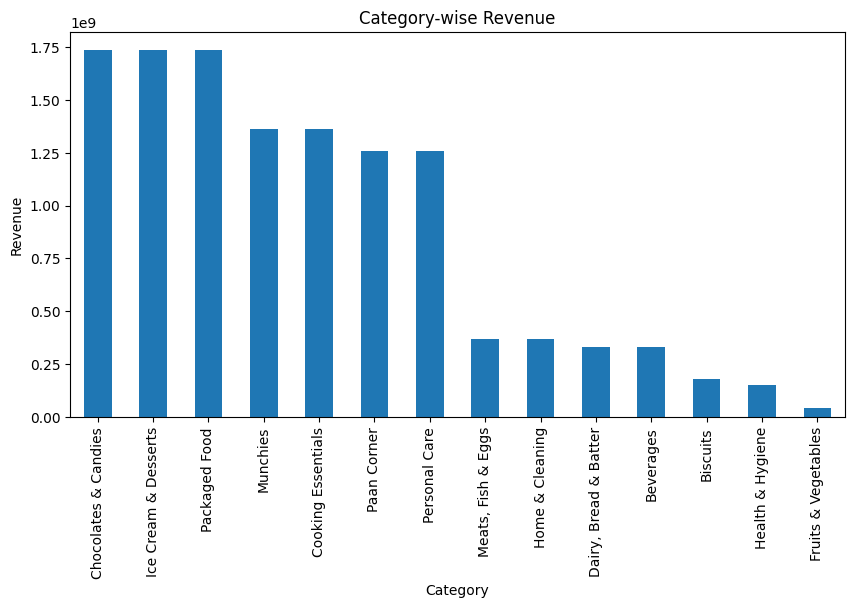

In [43]:
category_revenue = df.groupby('category')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
category_revenue.plot(kind='bar')
plt.title("Category-wise Revenue")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.show()

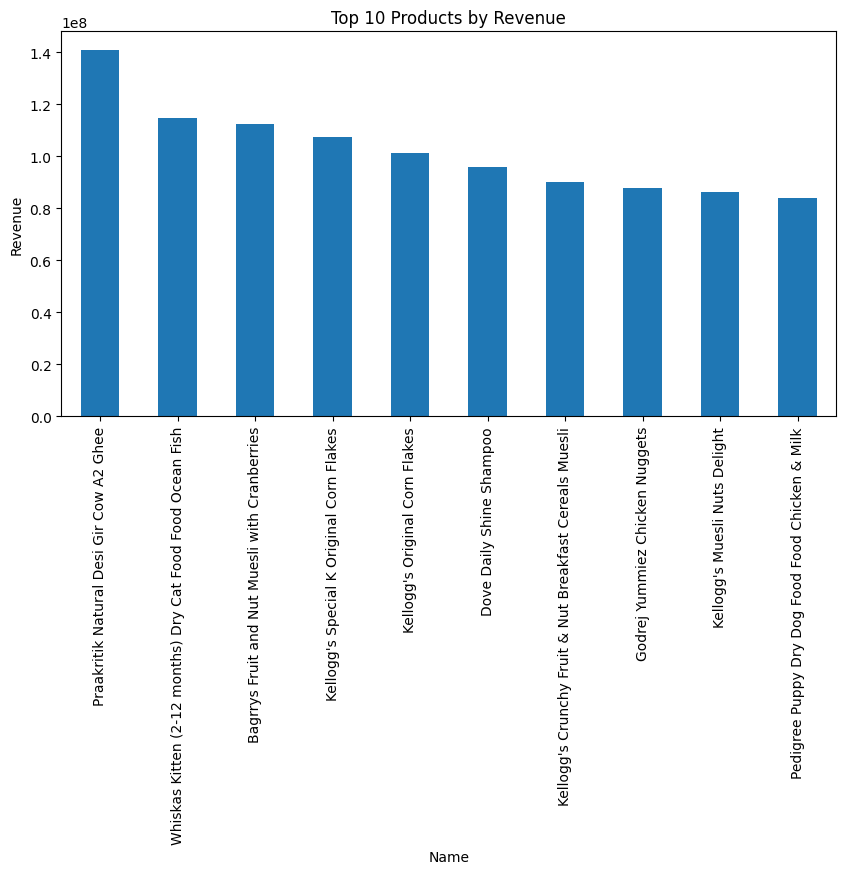

In [46]:
top_products = df.groupby('name')['revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_products.plot(kind='bar')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Name")
plt.ylabel("Revenue")
plt.show()

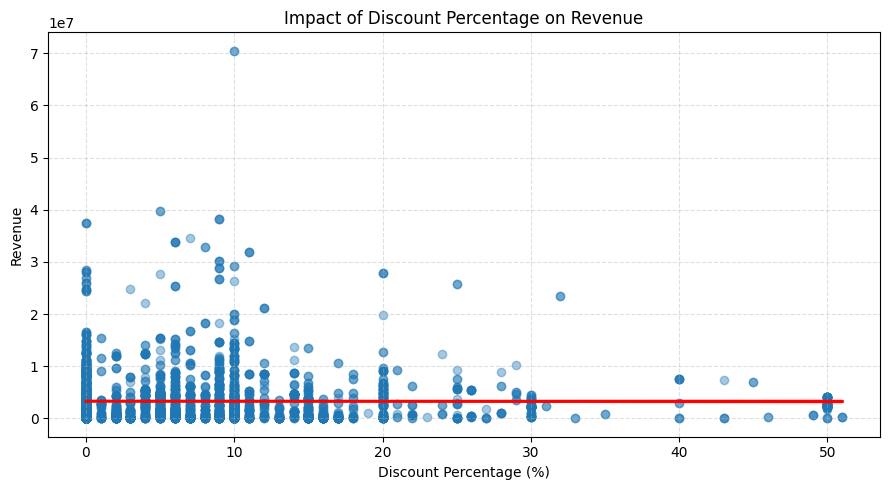

In [52]:
plt.figure(figsize=(9,5))

sns.regplot(
    data=df,
    x='discountpercent',
    y='revenue',
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}
)

plt.title("Impact of Discount Percentage on Revenue")
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Revenue")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Above scatter plot shows whether discount helps in generating revenue or not. If red line remains flat it means discount has no effect and towards upwards or downwards means profit or  loss accr.


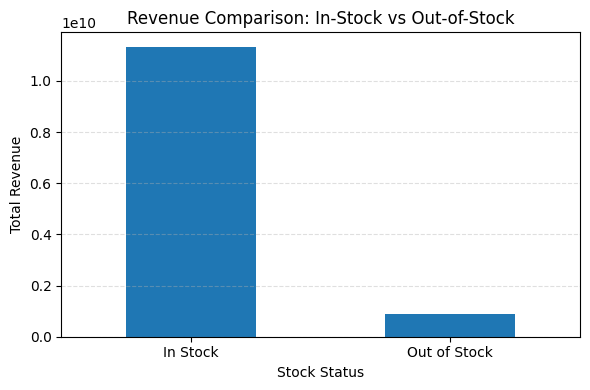

In [56]:
stock_analysis = df.groupby('outofstock')['revenue'].sum()

stock_analysis.index = ['In Stock', 'Out of Stock']

plt.figure(figsize=(6,4))
stock_analysis.plot(kind='bar')
plt.title("Revenue Comparison: In-Stock vs Out-of-Stock")
plt.xlabel("Stock Status")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

CUSTOMER BEHAVIOUR ANALYSIS


In [58]:
df.groupby('discountpercent')['quantity'].mean().sort_index()


,quantity
discountpercent,
0,195.570943
1,171.159091
2,172.548387
3,167.604651
4,309.860656
5,247.420354
6,281.375587
7,228.748031
8,241.898551


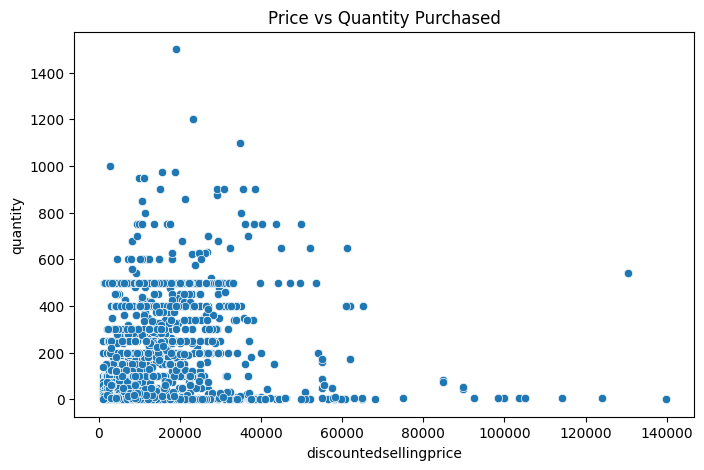

In [60]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='discountedsellingprice', y='quantity')
plt.title("Price vs Quantity Purchased")
plt.show()

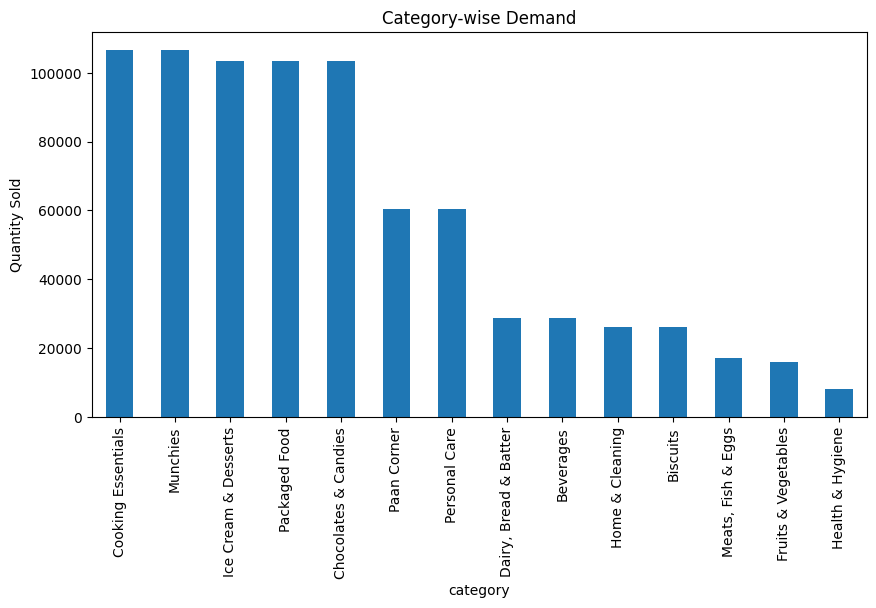

In [62]:
category_demand = df.groupby('category')['quantity'].sum().sort_values(ascending=False)

category_demand.plot(kind='bar', figsize=(10,5))
plt.title("Category-wise Demand")
plt.ylabel("Quantity Sold")
plt.show()

In [65]:
#high revenue--low discounted products
df[(df['discountpercent'] < 10) & (df['revenue'] > df['revenue'].mean())][
    ['name','category','revenue','discountpercent']
].sort_values(by='revenue', ascending=False)


,name,category,revenue,discountpercent
2931,Dove Daily Shine Shampoo,Personal Care,39780000,5
3275,Dove Daily Shine Shampoo,Paan Corner,39780000,5
2192,Whiskas Kitten (2-12 months) Dry Cat Food Food...,Chocolates & Candies,38170000,9
1416,Whiskas Kitten (2-12 months) Dry Cat Food Food...,Packaged Food,38170000,9
1804,Whiskas Kitten (2-12 months) Dry Cat Food Food...,Ice Cream & Desserts,38170000,9
...,...,...,...,...
2084,MTR Dal Makhani,Ice Cream & Desserts,3300000,0
1696,MTR Dal Makhani,Packaged Food,3300000,0
1697,MTR Ready to Eat Pav Bhaji,Packaged Food,3300000,0
2078,MTR Dal Fry,Ice Cream & Desserts,3300000,0


### Key Insights:
- Fruits & Vegetables generate the highest revenue.
- Higher discounts generally increase quantity sold.
- Some low-discount products still generate high revenue.
- Out-of-stock products cause revenue loss.
